# Dataset Information

Dream Housing finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process(real time) base on customer details provided while filling online application form. These details are Gender, Marital status, Education, No. of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task. A classification problem where we have to predict whether a loan would be approved or not.

# Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the dataset

In [6]:
#Find the null values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Fill the missing values for numerical terms
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

In [8]:
#Fill the missing values for Categorical terms- mode
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])


In [9]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

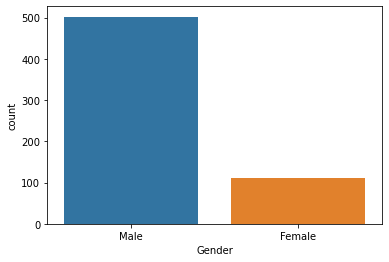

In [10]:
#Categorical attribute visualization
sns.countplot(train['Gender'])

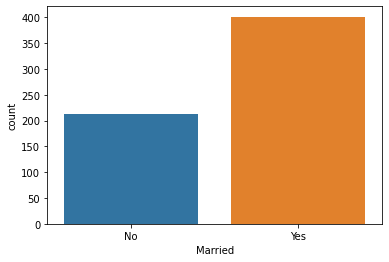

In [11]:
sns.countplot(train['Married'])

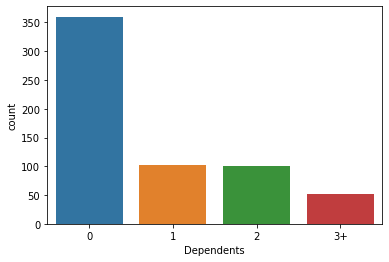

In [12]:
sns.countplot(train['Dependents'])

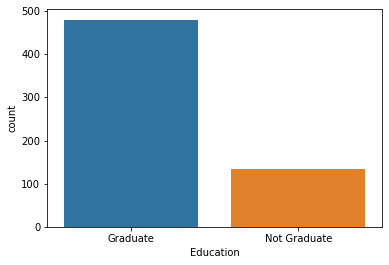

In [13]:
sns.countplot(train['Education'])

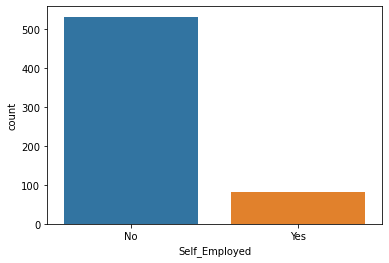

In [14]:
sns.countplot(train['Self_Employed'])

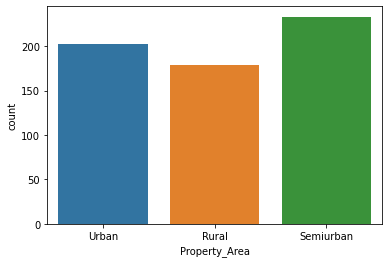

In [15]:
sns.countplot(train['Property_Area'])

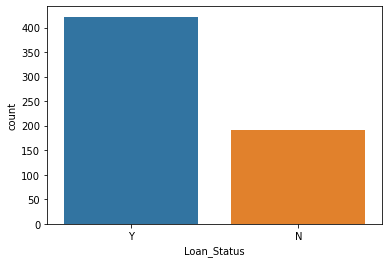

In [16]:
sns.countplot(train['Loan_Status'])

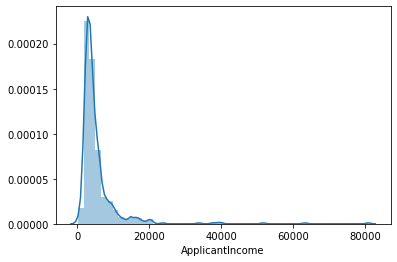

In [17]:
#Numerical attribute visualization
sns.distplot(train['ApplicantIncome'])

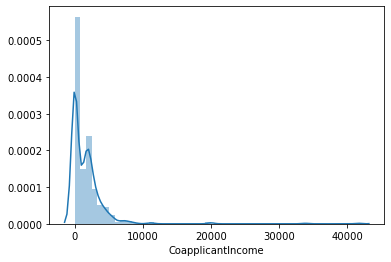

In [18]:
sns.distplot(train['CoapplicantIncome'])

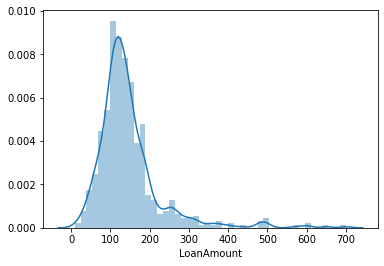

In [19]:
sns.distplot(train['LoanAmount'])

C:\Users\ajha48\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


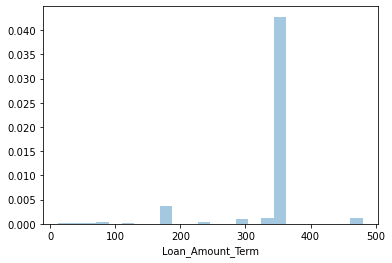

In [20]:
sns.distplot(train['Loan_Amount_Term'])

C:\Users\ajha48\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


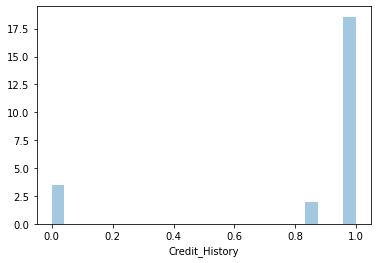

In [21]:
sns.distplot(train['Credit_History'])

In [22]:
##Creation of new arttribute
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [23]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Apply log transformation to the attribute

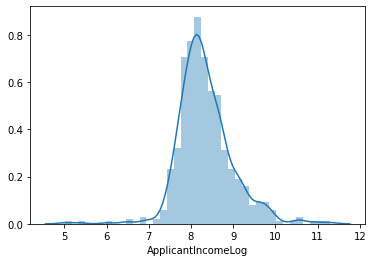

In [24]:
train['ApplicantIncomeLog'] = np.log(train['ApplicantIncome'])
sns.distplot(train['ApplicantIncomeLog'])

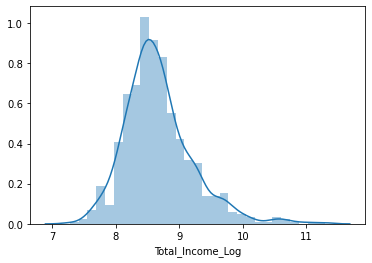

In [25]:
train['Total_Income_Log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_Log'])

In [26]:
train['CoapplicantIncomeLog'] = np.log(train['CoapplicantIncome'])
#sns.distplot(train['CoapplicantIncomeLog'])

C:\Users\ajha48\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


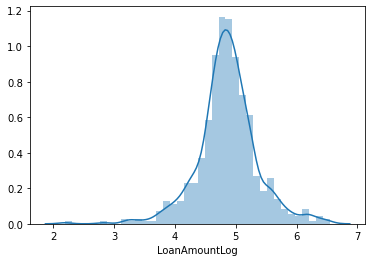

In [27]:
train['LoanAmountLog'] = np.log(train['LoanAmount'])
sns.distplot(train['LoanAmountLog'])

C:\Users\ajha48\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


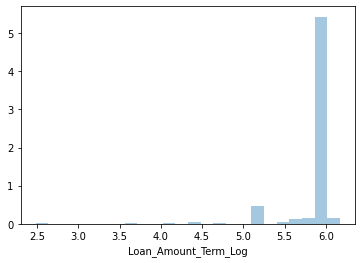

In [28]:
train['Loan_Amount_Term_Log'] = np.log(train['Loan_Amount_Term'])
sns.distplot(train['Loan_Amount_Term_Log'])


# Coorelation Matrix

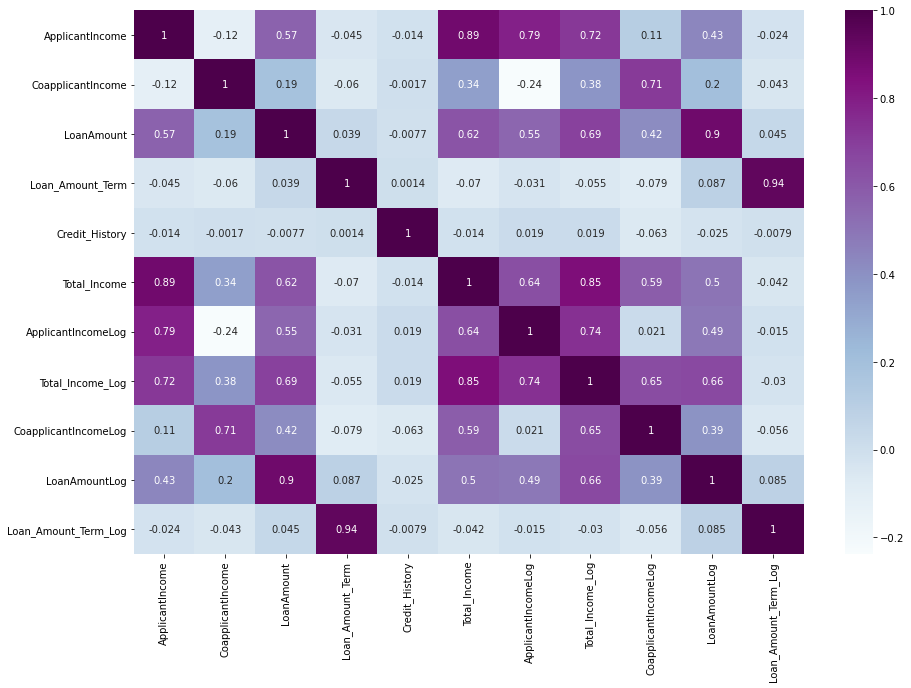

In [29]:
matrix=train.corr()
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(matrix,annot = True, cmap="BuPu");

In [30]:
#Drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Loan_ID', 'CoapplicantIncomeLog']
train = train.drop(columns=cols, axis = 1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Total_Income_Log,LoanAmountLog,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,8.674026,4.986426,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,8.714568,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,8.006368,4.189655,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,8.505323,4.787492,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,8.699515,4.948760,5.886104


# Label Incoding

In [31]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
#cols =['Dependents']
le = LabelEncoder()
for col in cols:
    train[col] = le.fit_transform(train[col])

In [32]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Total_Income_Log,LoanAmountLog,Loan_Amount_Term_Log
0,1,0,0,0,0,1.0,2,1,8.674026,8.674026,4.986426,5.886104
1,1,1,1,0,0,1.0,0,0,8.430109,8.714568,4.852030,5.886104
2,1,1,0,0,1,1.0,2,1,8.006368,8.006368,4.189655,5.886104
3,1,1,0,1,0,1.0,2,1,7.856707,8.505323,4.787492,5.886104
4,1,0,0,0,0,1.0,2,1,8.699515,8.699515,4.948760,5.886104


# Train-Test-Split

In [33]:
#Specify input and output attributes
x = train.drop(columns=['Loan_Status'], axis = 1)
y = train['Loan_Status']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Model Training

In [35]:
#creating a function for reuse it
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test,y_test)*100)
    #cross validation-it is used for better validation of model
    score = cross_val_score(model, x, y, cv = 5)
    print("Cross Validation iss", np.mean(score)*100)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy is 78.86178861788618
Cross Validation iss 80.9462881514061


In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy is 66.66666666666666
Cross Validation iss 70.52645608423298


In [38]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,x,y)

Accuracy is 77.23577235772358
Cross Validation iss 79.15900306544049


In [39]:
model = ExtraTreesClassifier()
classify(model,x,y)

Accuracy is 74.79674796747967
Cross Validation iss 77.52898840463814


# Hyperparameter tuining

In [40]:
model = RandomForestClassifier(n_estimators = 155, min_samples_split=20,max_depth=7,max_features=1)
classify(model,x,y)

Accuracy is 78.86178861788618
Cross Validation iss 80.13194722111156


# Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect prediction are summarized with count values and brokes down by each class. It gives us insight not only the errors being made by a classifier but more importantly the types of errors that are being made.


In [41]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[18, 25],
       [ 4, 76]], dtype=int64)

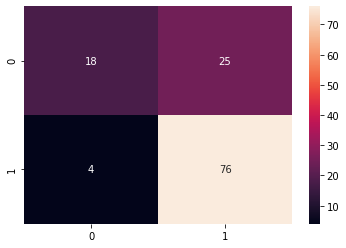

In [43]:
sns.heatmap(cm, annot =True)